<a href="https://colab.research.google.com/github/ACobo98/DataAnalysis_MachineLearning/blob/main/Group_2_Dimensionality_Reduction_Autonomous_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction on Embryo Development Timelapse

In this hands-on activity, you will apply a variety of dimensionality reduction techniques to analyze real microscopy data. The dataset contains time-lapse images of normal and mutant embryos. Each image stack has approximately 450 frames.

**Objectives:**


*   Explore, visualize, and preprocess multi-frame .tif images.
*   Test and compare different data normalization strategies (e.g., [0,1] scaling vs StandardScaler).
*  Use PCA, SVD, t-SNE, UMAP, and Autoencoders to extract and visualize developmental trajectories
*  Identify biological differences in developmental dynamics between embryo types.
*  Reflect on the advantages, limitations, and behaviors of each technique.

**Dataset:** https://drive.google.com/drive/folders/1_qxqm-v5yCrme3pAW2rjyOOXIeQDuV54



### Load and Explore the Dataset
Each .tif file contains ~450 grayscale frames. Your first task is to:

* Load the 3 .tif files using tifffile.imread.
* Normalize each image stack using two strategies:
* * [0, 1] Min-Max normalization
* * Standardization using StandardScaler
* Plot a few representative frames across time for each embryo.


1. **Download files:**

In [ ]:
import gdown

#Files IDs
files_ids = {
    "Control": "1qe3YnNRiae_ANEJP81QiByK513esMcF8",
    "Mutant1": "1TA2Fkmt0FXYMZzyZnCdQ5AoikMUa9n5Q",
    "Mutant2": "1jRjgXsswezrxlsUivMaxCNiuQGdKEr6M",
}
# Download
for name, fid in files_ids.items():
  url = f"https://drive.google.com/uc?id={fid}"
  output = f"{name}.tif"
  gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1qe3YnNRiae_ANEJP81QiByK513esMcF8
To: /content/Control.tif
100%|██████████| 18.1M/18.1M [00:00<00:00, 94.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TA2Fkmt0FXYMZzyZnCdQ5AoikMUa9n5Q
To: /content/Mutant1.tif
100%|██████████| 18.1M/18.1M [00:00<00:00, 103MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1jRjgXsswezrxlsUivMaxCNiuQGdKEr6M
To: /content/Mutant2.tif
100%|██████████| 18.1M/18.1M [00:00<00:00, 125MB/s]


2. **Load and explore**

In [ ]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
#Load and report basic info

def load(filename):
  stack = tiff.imread(filename).astype(np.float32)
  return stack

def report(filename):
  stack=filename
  print("\nArray shape (# frames, Height, Width): ",stack.shape)
  print("dtype: ",stack.dtype)
  print("Min pixel value:", np.min(stack), "Max pixel value:", np.max(stack))
  print("Mean:", np.mean(stack), "Std:", np.std(stack))

#Load all three embryos

stack_c = load("Control.tif")
report(stack_c)
stack_m1 = load("Mutant1.tif")
report(stack_m1)
stack_m2 = load("Mutant2.tif")
report(stack_m2)


Array shape (# frames, Height, Width):  (450, 200, 200)
dtype:  float32
Min pixel value: 0.0 Max pixel value: 208.0
Mean: 41.69075 Std: 68.79459

Array shape (# frames, Height, Width):  (450, 200, 200)
dtype:  float32
Min pixel value: 0.0 Max pixel value: 237.0
Mean: 33.128197 Std: 59.376884

Array shape (# frames, Height, Width):  (450, 200, 200)
dtype:  float32
Min pixel value: 0.0 Max pixel value: 240.0
Mean: 31.844128 Std: 58.957203


**Notes:** Max pixel value=208, it suggests that the data is not full 8-bit (0-255); Std: high variation compared to the mean value, which means that there's a lot of contrast between dark and bright areas.

3. **Normalization:**



In [ ]:
from sklearn.preprocessing import StandardScaler

# [0,1] Min-Max normalization (global over the whole stack)
def minmax_normalize_stack(stack):
  vmin=np.min(stack)
  vmax=np.max(stack)
  return (stack - vmin) / (vmax - vmin)
# Standar Normalization
def zscore_standardize_stack(stack):
  n_frames, H, W = stack.shape
  X = stack.reshape(n_frames, -1) #Matrix (n_frames, n_pixels)
  scaler = StandardScaler(with_mean=True, with_std=True)
  Xz=scaler.fit_transform(X) #Standard Normalization (mu=0)
  stack_z = Xz.reshape(n_frames, H, W).astype(np.float32) #Original Matrix Shape
  return stack_z
#Normalizations:
#Control
stack_c_mm = minmax_normalize_stack(stack_c)
stack_c_z = zscore_standardize_stack(stack_c)
#Mutant1
stack_m1_mm = minmax_normalize_stack(stack_m1)
stack_m1_z = zscore_standardize_stack(stack_m1)
#Mutant2
stack_m2_mm = minmax_normalize_stack(stack_m2)
stack_m2_z = zscore_standardize_stack(stack_m2)

#Reports:
report(stack_c_mm)
report(stack_c_z)
report(stack_m1_mm)
report(stack_m1_z)
report(stack_m2_mm)
report(stack_m2_z)


Array shape (# frames, Height, Width):  (450, 200, 200)
dtype:  float32
Min pixel value: 0.0 Max pixel value: 1.0
Mean: 0.2004363 Std: 0.33074412

Array shape (# frames, Height, Width):  (450, 200, 200)
dtype:  float32
Min pixel value: -7.644143 Max pixel value: 21.189621
Mean: 7.286241e-08 Std: 0.6560868

Array shape (# frames, Height, Width):  (450, 200, 200)
dtype:  float32
Min pixel value: 0.0 Max pixel value: 1.0
Mean: 0.13978146 Std: 0.25053492

Array shape (# frames, Height, Width):  (450, 200, 200)
dtype:  float32
Min pixel value: -7.122394 Max pixel value: 21.189621
Mean: -5.1049125e-09 Std: 0.66132444

Array shape (# frames, Height, Width):  (450, 200, 200)
dtype:  float32
Min pixel value: 0.0 Max pixel value: 1.0
Mean: 0.13268402 Std: 0.24565631

Array shape (# frames, Height, Width):  (450, 200, 200)
dtype:  float32
Min pixel value: -6.3473825 Max pixel value: 21.189621
Mean: -7.04617e-09 Std: 0.6247998


4. **Visualization:**

<Figure size 640x480 with 0 Axes>

MinMax Normalized images:



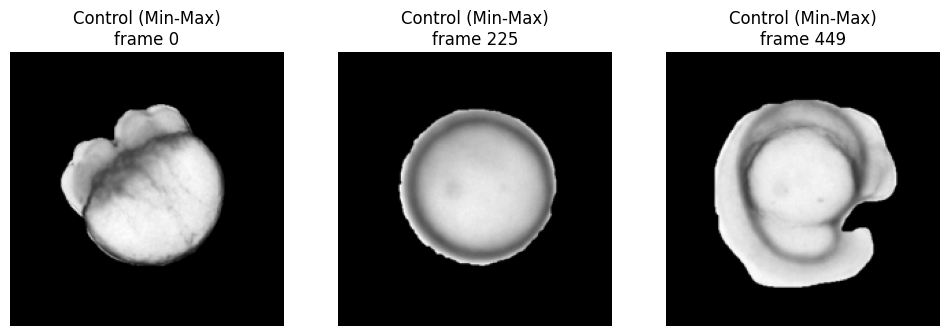

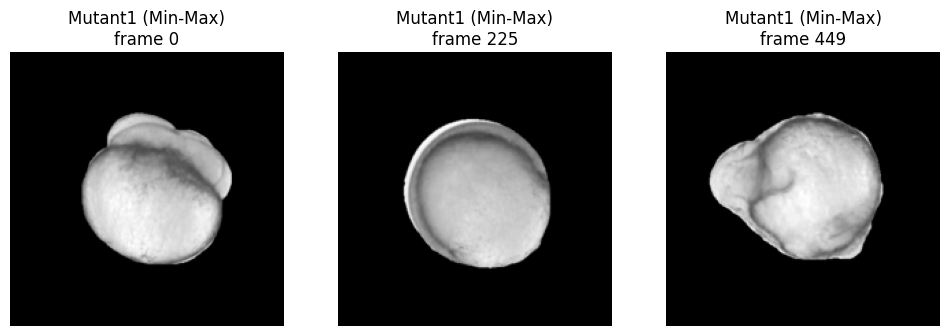

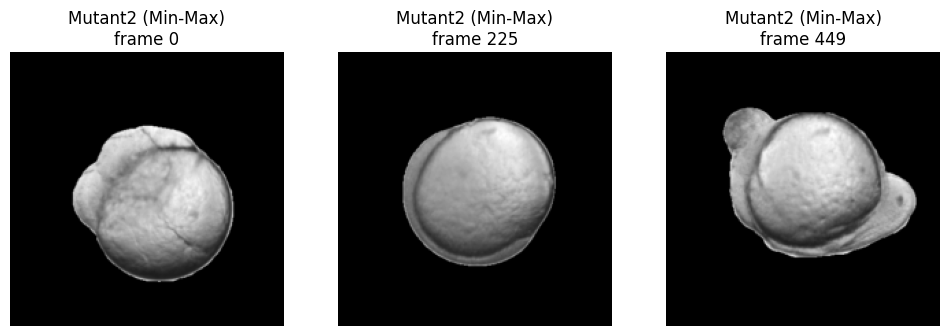

In [ ]:
import matplotlib.pyplot as plt
#Select indices
n_frames = stack_c.shape[0]
indices = [0, int(n_frames / 2), n_frames -1] #start, middle, end
#Plot function:
def plot_frames_minmax(stack, indices, title):
  plt.figure(figsize=(12, 4))
  for i, idx in enumerate(indices, start=1):
    plt.subplot(1, len(indices), i)
    plt.imshow(stack[idx], cmap="gray")
    plt.title(f"{title}\nframe {idx}")
    plt.axis("off")
plt.tight_layout()
plt.show()

print("MinMax Normalized images:\n")
plot_frames_minmax(stack_c_mm, indices, "Control (Min-Max)")
plot_frames_minmax(stack_m1_mm, indices, "Mutant1 (Min-Max)")
plot_frames_minmax(stack_m2_mm, indices, "Mutant2 (Min-Max)")

StandarsScale Normalized images:



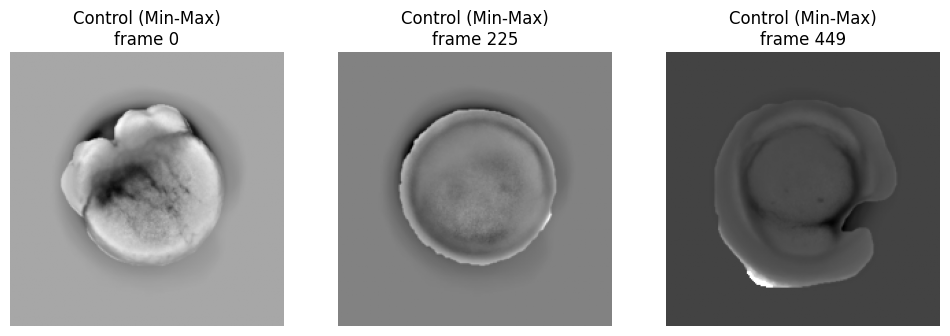

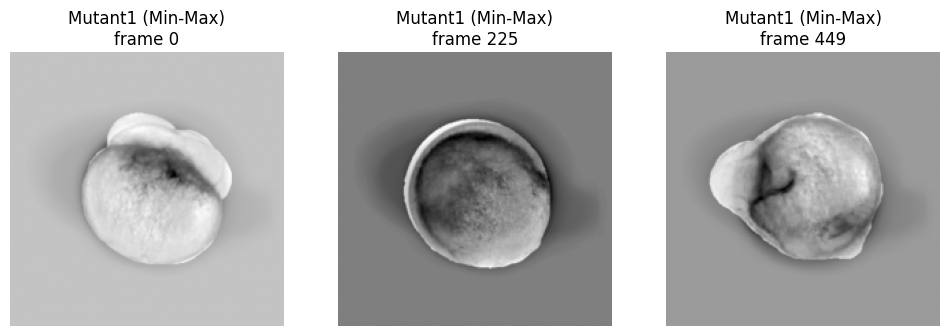

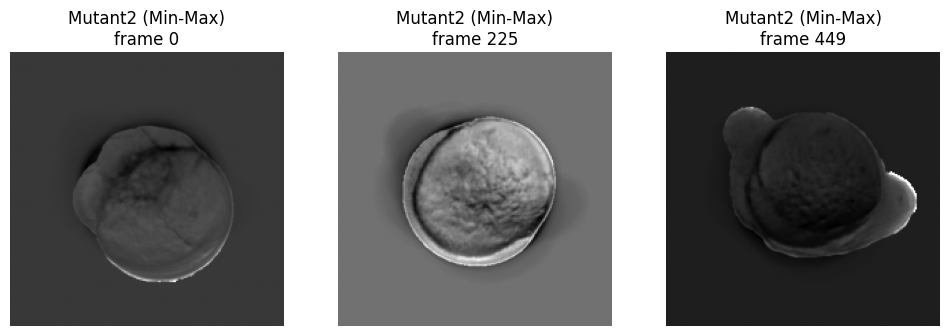

In [ ]:
print("StandarsScale Normalized images:\n")
plot_frames_minmax(stack_c_z, indices, "Control (Min-Max)")
plot_frames_minmax(stack_m1_z, indices, "Mutant1 (Min-Max)")
plot_frames_minmax(stack_m2_z, indices, "Mutant2 (Min-Max)")

No normalized images:



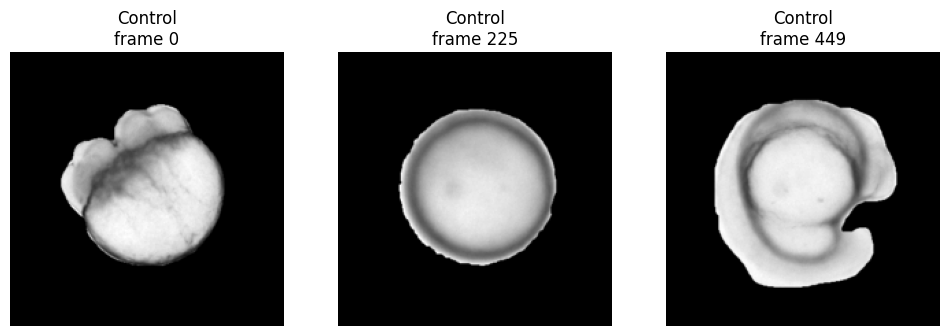

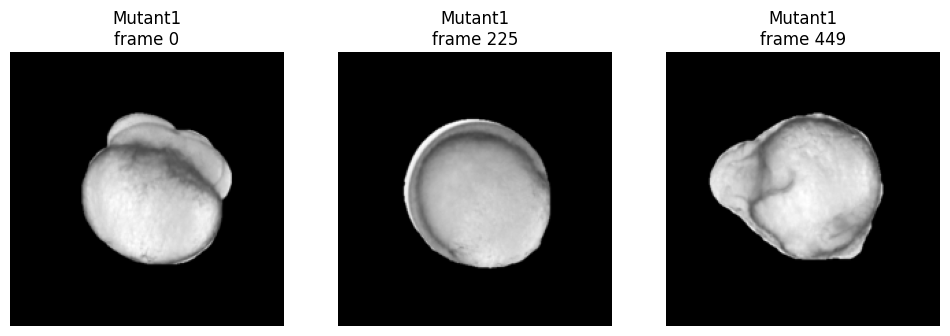

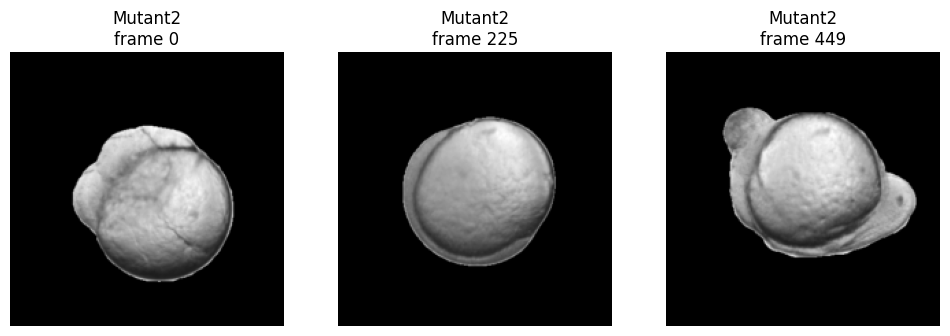

In [ ]:
print("No normalized images:\n")
plot_frames_minmax(stack_c, indices, "Control")
plot_frames_minmax(stack_m1, indices, "Mutant1")
plot_frames_minmax(stack_m2, indices, "Mutant2")

### Preprocess the Data

Flatten each frame and construct a matrix **X** with shape (n_frames, n_pixels) for each normalization method. Then create a label vector:
* label = 0 → control embryo
* label = 1 → mutant 1
* label = 2 → mutant 2

This step will prepare the input data for dimensionality reduction.

**Min-Max Normalization:**

In [ ]:
# Function to convert 3D stack (n_frames,H,W) into a 2D matrix (n_frames,n_pixels)
def stack_to_matrix(stack):
  n_frames, H, W = stack.shape
  X = stack.reshape(n_frames, H*W).astype(np.float32, copy=False)
  return X

#Build X for Min-Max normalized stacks
X_mm_c = stack_to_matrix(stack_c_mm)
X_mm_m1 = stack_to_matrix(stack_m1_mm)
X_mm_m2 = stack_to_matrix(stack_m2_mm)

#Concatenate vertically
X_mm = np.vstack([X_mm_c, X_mm_m1, X_mm_m2])

#Create label vector: 0=control, 1=mutant1, 2=mutant2
y_mm = np.concatenate([
    np.zeros(X_mm_c.shape[0], dtype=np.int64), np.ones(X_mm_m1.shape[0], dtype=np.int64), 2*np.ones(X_mm_m2.shape[0], dtype=np.int64)
])

print("X_mm shape:", X_mm.shape, "(n_frames_total, n_pixels)")
print("y_mm shape:", y_mm.shape)
print("Class counts (mm):",
      (y_mm==0).sum(), "(control),",
      (y_mm==1).sum(), "(mutant1),",
      (y_mm==2).sum(), "(mutant2)")


X_mm shape: (1350, 40000) (n_frames_total, n_pixels)
y_mm shape: (1350,)
Class counts (mm): 450 (control), 450 (mutant1), 450 (mutant2)


**StandardScaler Normalization:**

In [ ]:
#Build X for standard normalized stacks
X_z_c = stack_to_matrix(stack_c_z)
X_z_m1 = stack_to_matrix(stack_m1_z)
X_z_m2 = stack_to_matrix(stack_m2_z)

#Concatenate vertically
X_z = np.vstack([X_z_c, X_z_m1, X_z_m2])

#Create label vector: 0=control, 1=mutant1, 2=mutant2
y_z = np.concatenate([
    np.zeros(X_z_c.shape[0], dtype=np.int64), np.ones(X_z_m1.shape[0], dtype=np.int64), 2*np.ones(X_z_m2.shape[0], dtype=np.int64)
])

print("X_z shape:", X_z.shape, "(n_frames_total, n_pixels)")
print("y_z shape:", y_z.shape)
print("Class counts (z):",
      (y_z==0).sum(), "(control),",
      (y_z==1).sum(), "(mutant1),",
      (y_z==2).sum(), "(mutant2)")

X_z shape: (1350, 40000) (n_frames_total, n_pixels)
y_z shape: (1350,)
Class counts (z): 450 (control), 450 (mutant1), 450 (mutant2)


### PCA (Princpal Component Analysis)

Apply PCA on both normalized datasets:

* Visualize the 2D PCA embedding colored by embryo type.
* Compare the separation between classes for X_minmax and X_standard.
* Plot the explained variance ratio and cumulative variance for each.

**Tip:** Use PCA(n_components=2) for plotting and PCA(n_components=50) to analyze cumulative variance.

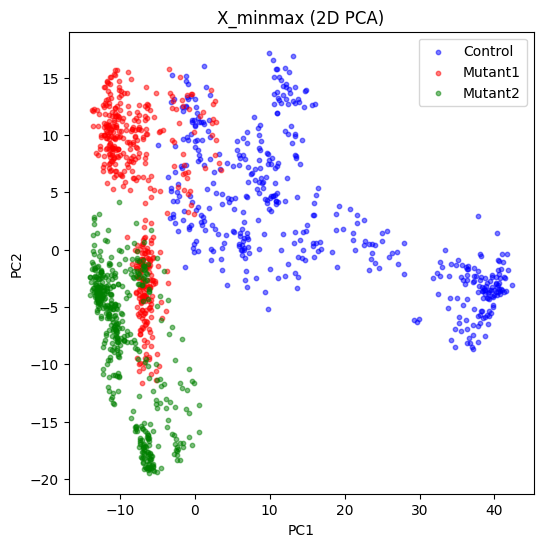

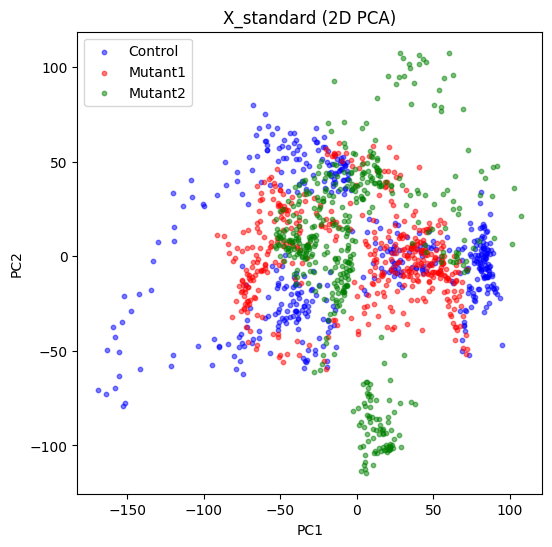

In [ ]:
from sklearn.decomposition import PCA

def run_pca_plot(X, y, title):
  pca2 = PCA(n_components=2)
  X_pca2 = pca2.fit_transform(X)

  #Plot
  plt.figure(figsize=(6,6))
  for label, color, name in [(0, "blue", "Control"),(1, "red", "Mutant1"),(2, "green", "Mutant2")]:
    plt.scatter(
        X_pca2[y==label, 0], #PC1 for each label
        X_pca2[y==label, 1], #PC2 for each label
        c=color, alpha=0.5, s=10, label=name
    )
  plt.xlabel("PC1")
  plt.ylabel("PC2")
  plt.title(title + " (2D PCA)")
  plt.legend()
  plt.show()

  return X_pca2, pca2

# Min-Max PCA
X_mm_pca2, pca_mm2 = run_pca_plot(X_mm, y_mm, "X_minmax")

# Z-score PCA
X_z_pca2, pca_z2 = run_pca_plot(X_z, y_z, "X_standard")


### SVD (Singular Value Decomposition)

Apply SVD to both datasets and analyze:

* The decay of singular values on a log scale.
* The cumulative energy of singular values.
* Compare how quickly each normalization captures energy.

**Insight:** SVD reveals the inherent structure of your dataset. A sharper drop often suggests stronger linear compreessibility.

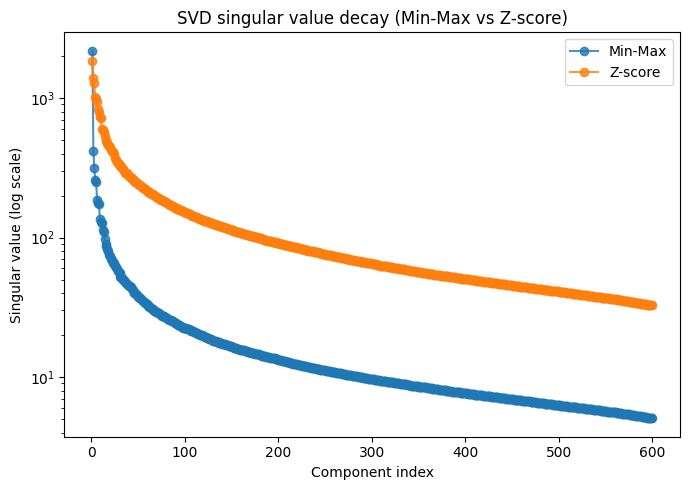

In [ ]:
from sklearn.utils.extmath import randomized_svd

#Funtion to compute top-k singular values and energy ratios
def svd_summary(X, n_components=200, random_state=0):
  #Total energy:
  total_energy = float(np.linalg.norm(X, ord='fro')**2)

  # randomized SVD for efficiency on large matrices
  k = min(n_components, min(X.shape) - 1)
  U, S, Vt = randomized_svd(X, n_components=k, random_state=random_state)

  # cummulative energy ratio using top-k
  cum_energy = np.cumsum(S**2)
  cum_energy_ratio = cum_energy / total_energy  # fraction of total energy captured by first i comps

  return S, cum_energy_ratio, total_energy


#Number of components
Nk=600
# Min-Max
S_mm, cum_mm, E_mm = svd_summary(X_mm, n_components=Nk, random_state=0)
#Standarized
S_z,  cum_z,  E_z  = svd_summary(X_z,  n_components=Nk, random_state=0)

#Plot decay singular values
plt.figure(figsize=(7,5))
plt.semilogy(range(1, len(S_mm)+1), S_mm, marker='o', linestyle='-', alpha=0.8, label='Min-Max')
plt.semilogy(range(1, len(S_z)+1),  S_z,  marker='o', linestyle='-', alpha=0.8, label='Z-score')
plt.xlabel('Component index')
plt.ylabel('Singular value (log scale)')
plt.title('SVD singular value decay (Min-Max vs Standar)')
plt.legend()
plt.tight_layout()
plt.show()


Cumulative Energy:

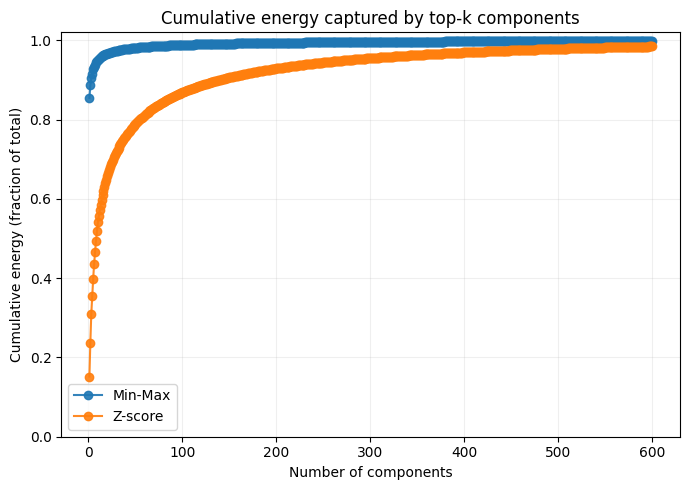

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(range(1, len(cum_mm)+1), cum_mm, marker='o', linestyle='-', alpha=0.9, label='Min-Max')
plt.plot(range(1, len(cum_z)+1),  cum_z,  marker='o', linestyle='-', alpha=0.9, label='Z-score')
plt.xlabel('Number of components')
plt.ylabel('Cumulative energy (fraction of total)')
plt.title('Cumulative energy captured by top-k components')
plt.ylim(0, 1.02)
plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()


### t-SNE
Use t_SNE to capture local structure and dynamics:

* Run t-SNE with different perplexities [5, 30, 100].
* Plot the 2D embeddings and analyze how clusters behave.
* Compare results between both normalized inputs.

**Note:** t-SNE is computationally intensive and sensitive to hyperparameters.

In [ ]:
from sklearn.manifold import TSNE

# Simple color map for labels
LABEL_INFO = {
    0: ("Control", "blue"),
    1: ("Mutant1", "red"),
    2: ("Mutant2", "green"),
}
#Run t-SNE to 2D with a given perplexity
def run_tsne(X, perplexity=30):
  tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        random_state=42
    )
  X_tsne = tsne.fit_transform(X)
  return X_tsne

#Scatter plot of a 2D embedding
def plot_tsne(X_tsne, y, title):
    plt.figure(figsize=(6,6))
    for label in sorted(np.unique(y)):
      name, color = LABEL_INFO[int(label)]
      plt.scatter(
           X_tsne[y==label, 0], #1st Component
           X_tsne[y==label, 1], #2nd Component
            c=color, s=6, alpha=0.7, label=name
      )
    plt.title(title)
    plt.xticks([]); plt.yticks([])
    plt.legend(markerscale=2, frameon=True)
    plt.tight_layout()
    plt.show()

Plot t-SNE-Min-Max

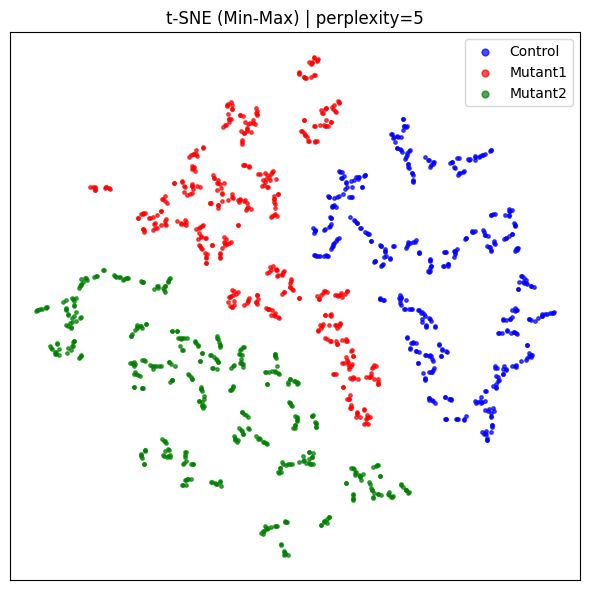

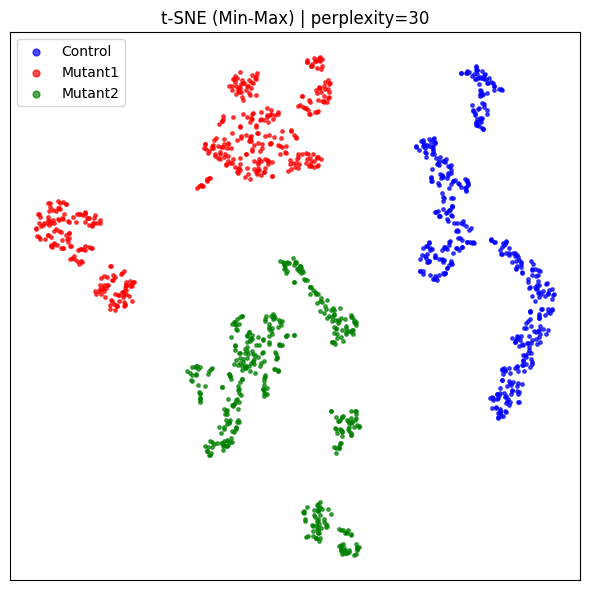

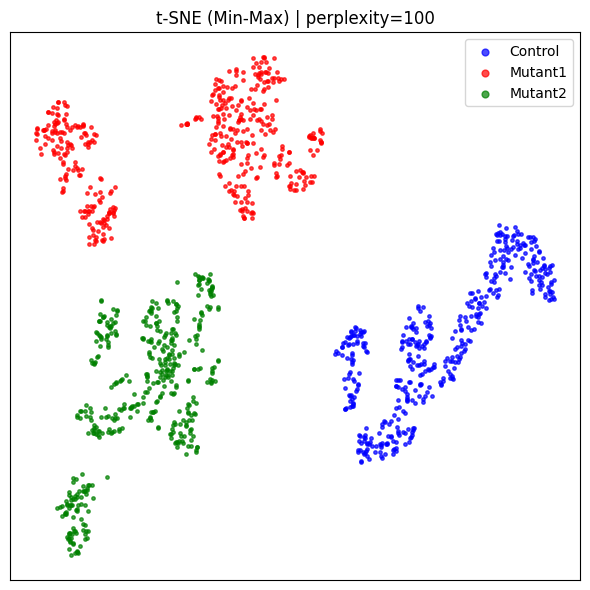

In [ ]:
perplexities = [5, 30, 100]

for perp in perplexities:
    # t-SNE
    X_mm_tsne = run_tsne(X_mm, perplexity=perp)
    # Plot
    plot_tsne(X_mm_tsne, y_mm, title=f"t-SNE (Min-Max) | perplexity={perp}")


Plot t-SNE-Standarized

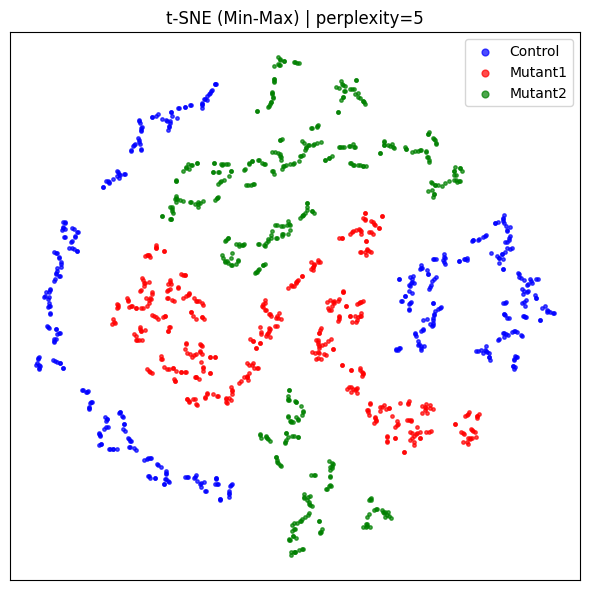

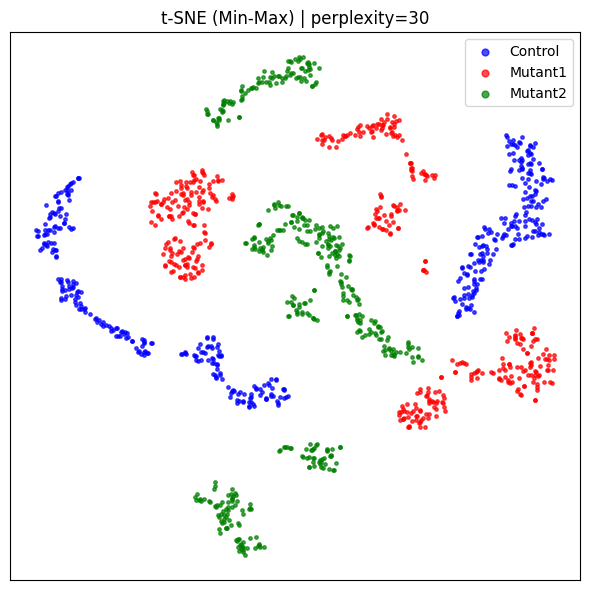

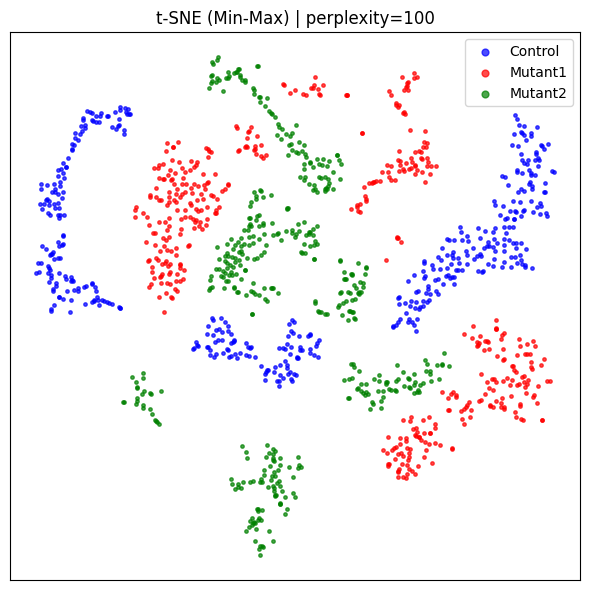

In [ ]:
for perp in perplexities:
    # t-SNE
    X_z_tsne = run_tsne(X_z, perplexity=perp)
    # Plot
    plot_tsne(X_z_tsne, y_z, title=f"t-SNE (Min-Max) | perplexity={perp}")

### UMAP

Use UMAP for global structure visualization:

* Try combinations of n_neighbors and min_dist.
* Compare embeddings across normalization methods.
* Observe both local clustering and trajectory smoothness.

UMAP is faster and often preserves better continuity in developmental trajectories.

In [ ]:
import umap

# UMAP to 2D with chosen n_neighbors and min_dist
def run_umap(X, n_neighbors=15, min_dist=0.1, random_state=0):
    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=2,
        random_state=random_state
    )
    X_umap = reducer.fit_transform(X)
    return X_umap
#Plot 2D scatter by class label
def plot_embedding_2d(X_emb, y, title):
  plt.figure(figsize=(6,6))
  for label in sorted(np.unique(y)):
        name, color = LABEL_INFO[int(label)]
        plt.scatter(
            X_emb[y==label, 0], X_emb[y==label, 1],
            c=color, s=6, alpha=0.7, label=name
        )
  plt.title(title)
  plt.xticks([]); plt.yticks([])
  plt.legend(markerscale=2, frameon=True)
  plt.tight_layout()
  plt.show()


Min-Max:

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


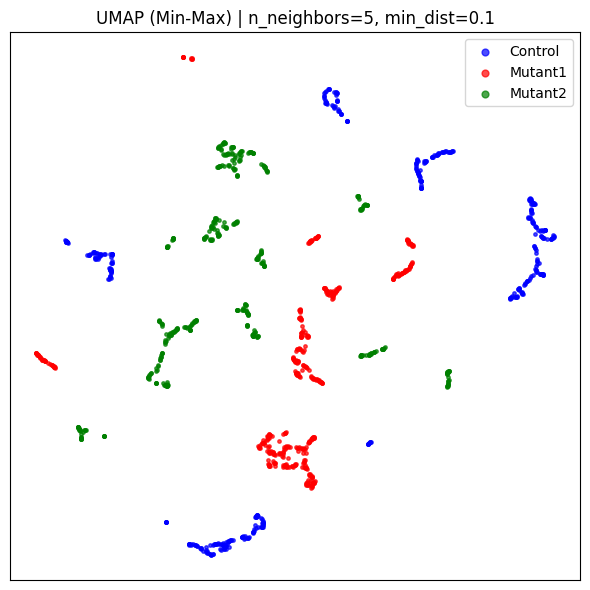

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


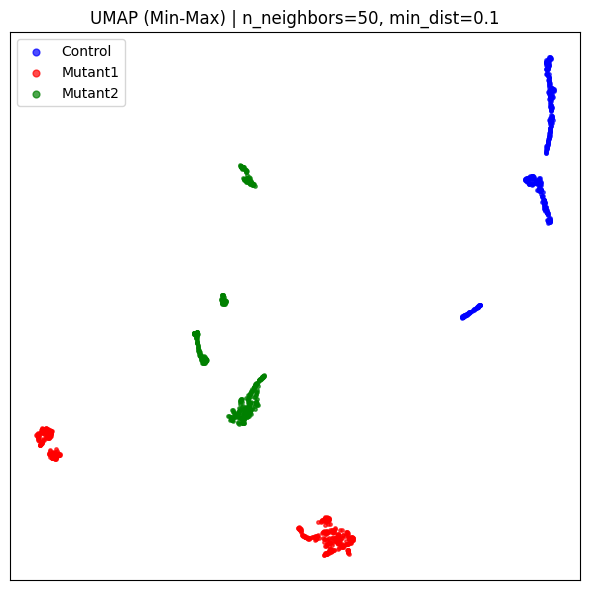

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


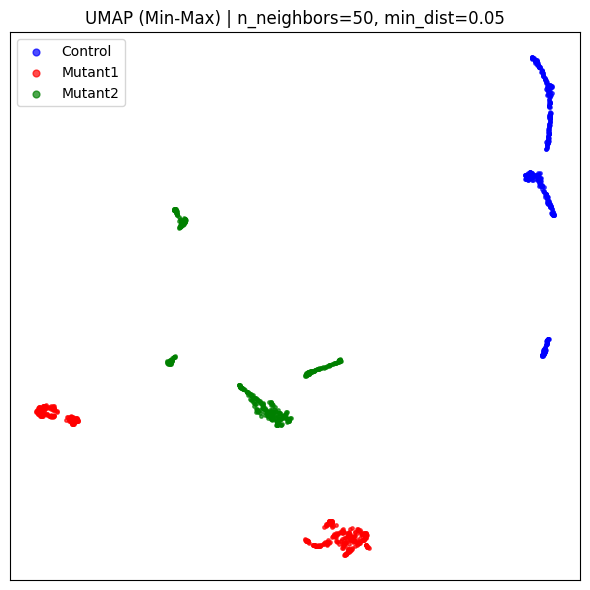

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


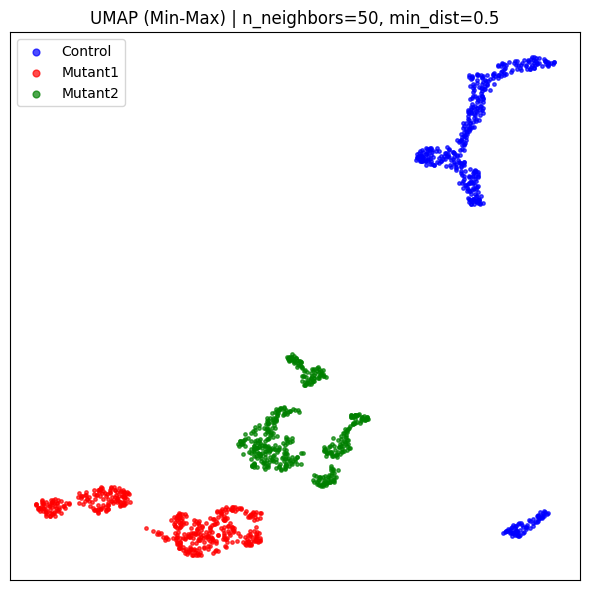

In [ ]:
pairs = [(5, 0.1), (50, 0.1), (50, 0.05), (50, 0.5)]

for nn, md in pairs:
    X_mm_umap = run_umap(
        X_mm, n_neighbors=nn, min_dist=md, random_state=0
    )
    plot_embedding_2d(X_mm_umap, y_mm, title=f"UMAP (Min-Max) | n_neighbors={nn}, min_dist={md}")


Standarized:

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


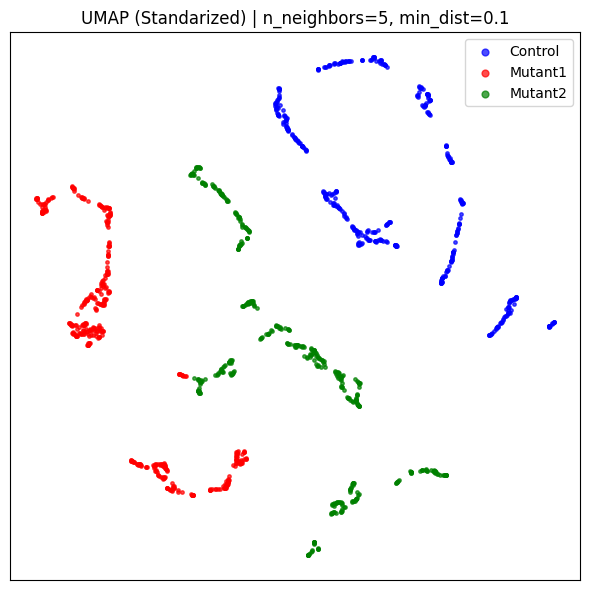

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


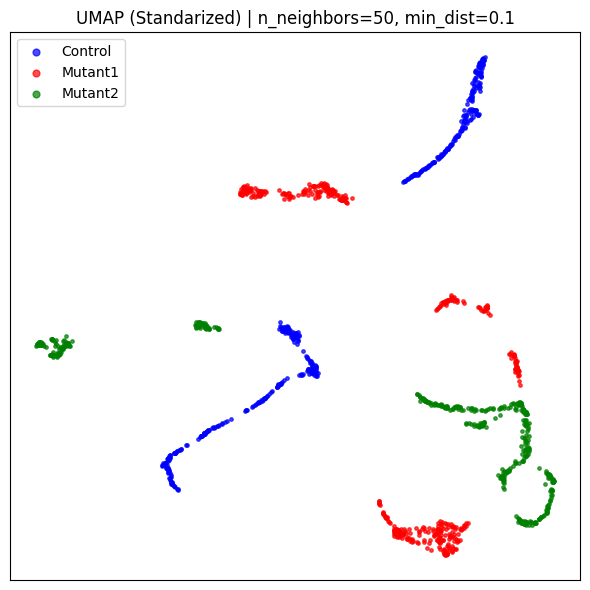

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


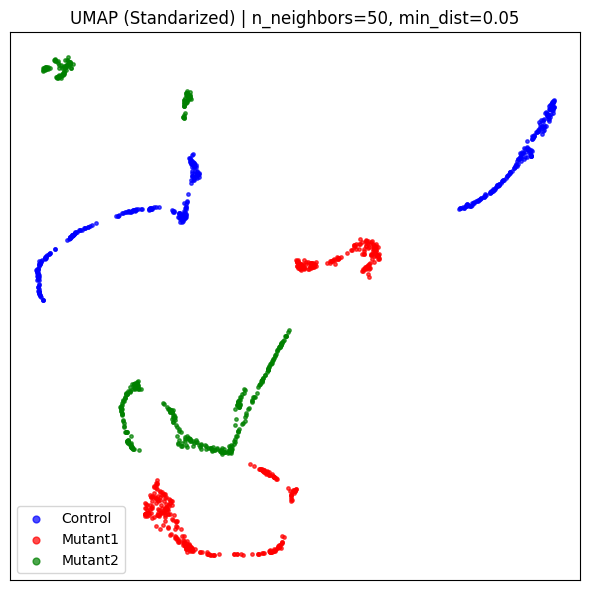

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


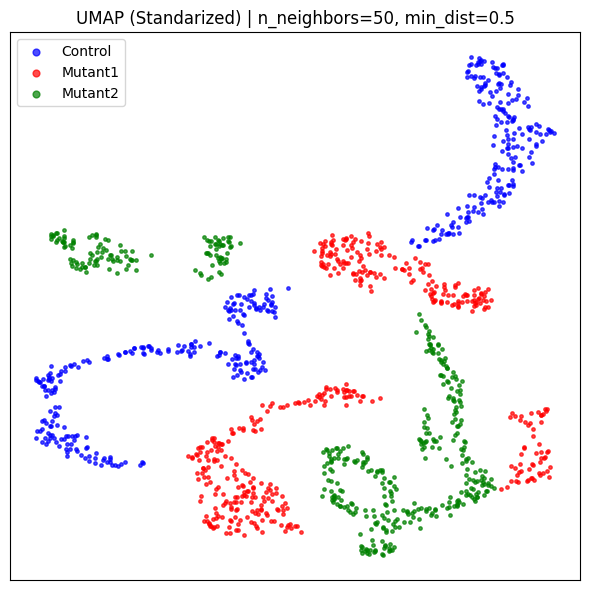

In [ ]:
for nn, md in pairs:
    X_z_umap = run_umap(
        X_z, n_neighbors=nn, min_dist=md, random_state=0
    )
    plot_embedding_2d(X_z_umap, y_z, title=f"UMAP (Standarized) | n_neighbors={nn}, min_dist={md}")


### Autoencoder
Train a neural autoencoder to learn a 2D latent space:
* Architecture: input → 128 → 32 → 2 → 32 → 128 → output.
* Use ReLU activations and MSE loss.
* Plot the latent 2D representations colored by embryo.

Autoencoders are flexible nonlinear methods that may capture dynamics not seen by linear projections.

In [ ]:
from tensorflow.keras import layers, models, optimizers

#select the normalization
X=X_mm
Y=y_mm

input_dim = X.shape[1]

encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),     # input layer
    layers.Dense(128, activation="relu"), # hidden 1
    layers.Dense(32, activation="relu"),  # hidden 2
    layers.Dense(2, name="latent")        # latent 2D
])
decoder = models.Sequential([
    layers.Input(shape=(2,)),             # latent input
    layers.Dense(32, activation="relu"),  # hidden 1
    layers.Dense(128, activation="relu"), # hidden 2
    layers.Dense(input_dim, activation="linear")  # output = reconstruction
])

autoencoder = models.Sequential([encoder, decoder])

autoencoder.compile(optimizer=optimizers.Adam(1e-3), loss="mse")

history = autoencoder.fit(
    X, X, #Input and target
    epochs=20,
    batch_size=256,
    shuffle=True,
    verbose=1
)




Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 379ms/step - loss: 0.0909
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 445ms/step - loss: 0.0221
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 406ms/step - loss: 0.0203
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 355ms/step - loss: 0.0163
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 365ms/step - loss: 0.0159
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 398ms/step - loss: 0.0148
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step - loss: 0.0140
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 359ms/step - loss: 0.0129
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step - loss: 0.0122
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 357ms/step - loss: 0.0120
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 382ms/step - loss: 0.0118
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 501ms/step - loss: 0.0118
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step - loss: 0.0117
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 361ms/step - loss: 0.0116
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 363ms/step - loss: 0.0114
Epoch 16/20
6/6 ━━━

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


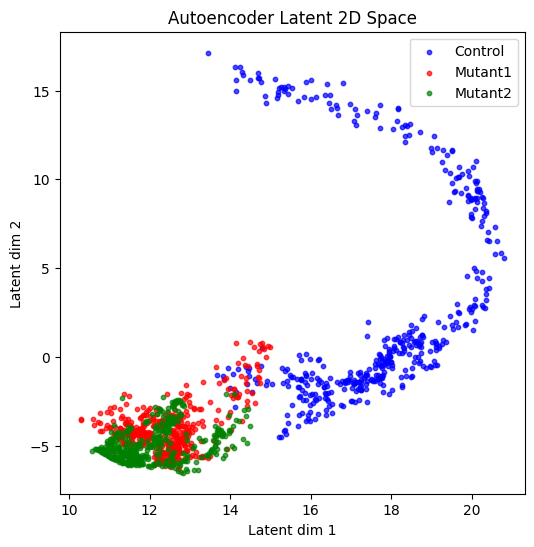

In [ ]:
# Pass data through encoder only
X_latent = encoder.predict(X)

plt.figure(figsize=(6,6))
for label in np.unique(Y):
    name, color = LABEL_INFO[int(label)]
    plt.scatter(
        X_latent[Y==label, 0],
        X_latent[Y==label, 1],
        c=color, label=name, alpha=0.7, s=10
    )
plt.title("Autoencoder Latent 2D Space")
plt.xlabel("Latent dim 1")
plt.ylabel("Latent dim 2")
plt.legend()
plt.show()